/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


**************************************************************************

**************************当前是第1列数据,共46列**************************

**************************************************************************

          hpy
0   18.486030
1   16.659368
2   11.810726
3   15.649023
4    7.258675
5    6.138970
6   13.075617
7    9.495136
8   14.900321
9   14.519237
10   2.936762
11   4.034646
12   0.613463
13  -2.066029
14  13.915032
15  15.721114
16  20.408648
17  22.649654
18  16.417446
19   8.495744
20   7.548404
21   6.842692
22  11.366377
23   9.767783
24   9.271002
25   5.805615
26  -0.474004
27   5.381217
28   6.891203
29   7.364217
30  18.510127
31  11.222286
32   8.424191
33   6.943030
34  -0.463725
35  -0.843691
36  -0.603896
37   0.534724
38   1.194278
39   5.707044
40   6.876071
41   6.600569
42  17.186276
43  10.821896
44  10.994187
45   9.278961
46   6.219949
47   4.375840


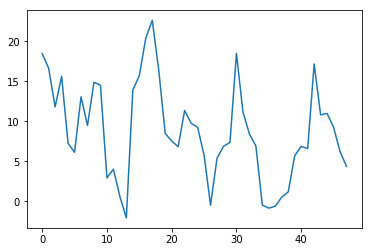

[[0.83153919]
 [0.75763221]
 [0.56145544]
 [0.7167535 ]
 [0.37727884]
 [0.33197543]
 [0.61263314]
 [0.46776638]
 [0.6864609 ]
 [0.67104219]
 [0.20241363]
 [0.24683417]
 [0.10841261]
 [0.        ]
 [0.64659597]
 [0.71967029]
 [0.90932861]
 [1.        ]
 [0.747844  ]
 [0.42733081]
 [0.38900129]
 [0.3604481 ]
 [0.54347702]
 [0.47879769]
 [0.45869789]
 [0.31848782]
 [0.06441354]
 [0.30131662]
 [0.36241086]
 [0.38154907]
 [0.83251417]
 [0.53764709]
 [0.42443576]
 [0.36450781]
 [0.06482945]
 [0.04945598]
 [0.05915812]
 [0.10522685]
 [0.13191248]
 [0.31449962]
 [0.36179863]
 [0.35065178]
 [0.77895096]
 [0.52144727]
 [0.52841818]
 [0.45901988]
 [0.33525184]
 [0.26063891]]
[[[0.8315391936368477], [0.7576322074376307], [0.5614554433515826], [0.7167535007971539], [0.37727884450385346]], [[0.7576322074376307], [0.5614554433515826], [0.7167535007971539], [0.37727884450385346], [0.3319754272182265]], [[0.5614554433515826], [0.7167535007971539], [0.37727884450385346], [0.3319754272182265], [0.6126331

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
% matplotlib inline 

# 加载数据
path = r"./dataSets/房地产行业景气指数&市场风险预警.xlsx"
Matrix_pre = np.zeros(shape=(10,1))
for i in range(1,2):
    
    print('**************************************************************************\n')
    print('**************************当前是第'+str(i)+'列数据,共46列**************************\n')
    print('**************************************************************************\n')
    # 读入数据并展示
    dataset = pd.read_excel(path, sheet_name = "index", usecols= [i], skiprows = [0,1], nrows = 48)
    datasets = np.array(dataset)
    print(dataset)
    plt.plot(dataset)
    plt.show()

        
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataSet = scaler.fit_transform(datasets)
    print(dataSet)



    # split into train and test sets; 80% 是训练数据，其余是测试数据
    train_size = int(len(dataSet) * 0.8)
    test_size = len(dataSet) - train_size
    train, test = dataSet[0:train_size], dataSet[train_size:len(dataSet)]

    # 数据格式转化(t,t+1)
    def convert_data(data, time_step=1):
        data_X,data_Y = [],[]  
        for i in range(len(data) - time_step - 1):
            x = data[i: (i + time_step)]  
            y = data[i+1:i + time_step+1]      
            data_X.append(x.tolist())
            data_Y.append(y.tolist()) 
        return data_X, data_Y


    # use this function to prepare the train and test datasets for modeling
    time_step = 5      #时间步
    train_x, train_y = convert_data(train, time_step)
    test_x, test_y   = convert_data(test, time_step)
    print(train_x)
    import tensorflow as tf
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"
    print("tensorflow运行版本：" + tf.__version__)
                #———————————————————形成训练集—————————————————————
    #设置常量
    hidden_unit = 10       #hidden layer units 记忆和储存过去状态的节点个数
    batch_size = 5    #每一批次训练多少个样例
    input_size = 1      #输入层维度
    output_size = 1     #输出层维度
    lr = 0.0001       #学习率
    
    # 输入层、输出层权重、偏置
    X = tf.placeholder(tf.float32, [None,time_step, input_size] ,name = 'inputs')    #每批次输入网络的tensor
    print(X)
    Y = tf.placeholder(tf.float32, [None,time_step, output_size] ,name = 'outputs')   #每批次tensor对应的标签
    weights={
            'in':tf.Variable(tf.random_normal([input_size,hidden_unit])),
            'out':tf.Variable(tf.random_normal([hidden_unit,1]))
            }
    biases={
            'in':tf.Variable(tf.constant(0.1,shape=[hidden_unit,])),
            'out':tf.Variable(tf.constant(0.1,shape=[1,]))
            }
    # 定义LSTM网络        
    def lstm(batch):  #参数：输入网络批次数目
            w_in = weights['in']
            b_in = biases['in']
            input = tf.reshape(X,[-1,input_size])  #需要将tensor转成2维进行计算，计算后的结果作为隐藏层的输入
            lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(hidden_unit) #10个节点
            input_lstm = tf.matmul(input, w_in) + b_in
            input_lstm = tf.reshape(input_lstm, [-1, time_step, hidden_unit])  #将tensor转成3维，作为lstm cell的输入      
            init_state = lstm_cell.zero_state(batch,dtype = tf.float32)
            # output_rnn是记录lstm每个隐状态输出节点的结果，final_states是最后一个cell的结果，数据格式为tuple
            output_rnn, final_states = tf.nn.dynamic_rnn(
                lstm_cell, 
                input_lstm, 
                initial_state = init_state, 
                dtype = tf.float32 ) 
            output = tf.reshape(output_rnn, [-1, hidden_unit]) #  作为输出层的输入
            w_out = weights['out']
            b_out = biases['out']
            multi = tf.matmul(output, w_out)
            pred = tf.add(multi, b_out, name='preds') 
            return pred, final_states
    
    #训练模型
    train_loss = []
    def train_lstm():   
        global batch_size
        iteration = 1
        epochs = 500
        pred, _ = lstm(batch_size)
        # 损失函数
        loss = tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
        train_op = tf.train.AdamOptimizer(lr).minimize(loss)
        saver = tf.train.Saver(tf.global_variables())
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for e in range(epochs):
                step=0
                start = 0
                end = start + batch_size
                while(end < len(train_x)):
                    x = train_x[start:end]
                    y = train_y[start:end]
                    _,loss_ = sess.run([train_op, loss], feed_dict = {X: x, Y:y})
                    start += batch_size
                    end = start + batch_size
                    # 每10步保存一次参数
                    if step% 10 == 0:                    
                        print("Epoch: {}/{}".format(e, epochs),
                        "Iteration: {:d}".format(iteration),
                        "Train loss: {:6f}".format(loss_))
#                         
                    train_loss.append(loss_)
                    iteration += 1  
                    step += 1
            print([n.name for n in sess.graph.as_graph_def().node])
            saver.save(sess, "./models/checkpoints-lstm/predict.ckpt")
            # 保存二进制模型
            builder = tf.saved_model.builder.SavedModelBuilder('./models/model2')
            builder.add_meta_graph_and_variables(sess, ["mytag"])
            builder.save()

           
            #绘训练过程指标图
            t = np.arange(iteration - 1)
            plt.figure(figsize = (9,6))
            plt.plot(t, np.array(train_loss),  'r-')
            plt.xlabel("iteration")
            plt.ylabel("Loss")
            plt.legend(['train'], loc='upper right')
            plt.show()        

#     with tf.variable_scope('rnn', reuse=tf.AUTO_REUSE):
#         train_lstm()

        
        
        
        
        
        
    from sklearn.metrics import mean_squared_error
    import math

    # 预测模型
    def prediction():

            pred, _ = lstm(1)  # 预测时只输入[1,time_step,inputSize]的测试数据
            saver = tf.train.Saver(tf.global_variables())
            #预测季度
            pre_quarter = 7
            with tf.Session() as sess:
                # 参数恢复
                module_file = tf.train.latest_checkpoint("./models/checkpoints-lstm")
                saver.restore(sess, module_file)
                # 取训练集最后一行为测试样本. shape=[1,time_step,inputSize],预测 测试数据 中10年进行误差比较
                prev_seq = train_x[-1]
                #print(prev_seq)
                predict = []
                # 得到之后10个季度的预测结果
                for i in range(pre_quarter):
                    print(prev_seq)
                    next_seq = sess.run(pred,feed_dict={X:[prev_seq]})
                    print("=======================")
                    print(next_seq)
                    predict.append(next_seq[-1])   
                    #每次得到最后一个时间步的预测结果，与之前的数据加在一起，形成新的测试样本
                    #np.vstack()表示垂直（按照行顺序）的把数组给堆叠起来。
                    prev_seq = np.vstack((prev_seq[1:],next_seq[-1]))

                # 得到实际预测值
                predictY = scaler.inverse_transform(predict)
                print(predict)
                testY = scaler.inverse_transform(test)
                print("预测值：", predictY)
                print("真实值：", testY)
                global Matrix_pre
                Matrix_pre = (np.hstack((Matrix_pre,predictY)))

                #以折线图表示结果
                plt.figure()
                plt.title("lead index")
                plt.plot(list(range(len(testY))), testY, 'cx--', list(range(len(predict))), predictY, 'b--')
                plt.xlabel("date-num")
                plt.ylabel("index")
                plt.legend(['train', 'pred'], loc='upper right')
                plt.plot()
                plt.show()

    with tf.variable_scope('rnn', reuse = tf.AUTO_REUSE):
        prediction() 

# #存进excel文件
# Matrix_input = pd.DataFrame(Matrix_pre)
# writer = pd.ExcelWriter('./output/房地产行业景气指数&市场风险预警预测数据.xlsx')
# Matrix_input.to_excel(writer, float_format='%.2f', header = False, index = False,) # float_format 控制精度
# writer.save()

print('**************************************************************************\n')
print('*********************************迭代结束*********************************\n')
print('**************************************************************************')